In [1]:
# env py36
# import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki

sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
print(hddm.__version__)

0.8.0


In [3]:
# load data. you will find this dataset in your hddm-folder under hddm/examples/rlddm_data.csv
data = hddm.load_csv("rlddm_false_choice.csv")
# check structure
data.head()

,subj_idx,ChoiceRT,ChoiceDemand,TaskDemand,trial,DemandAversive_on,DemandAversive_off_T1,DemandAversive_off_T2,DemandAversive_off_T3,DemandAvoidance_true,response,rt,split_by,feedback,q_init
0,40,0.016550,easy,mid,1,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,0,0.016550,0,-1,1
1,40,0.017136,hard,mid,2,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,1,0.017136,1,1,1
2,40,0.016106,easy,mid,3,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,0,0.016106,0,-1,1
3,40,0.015544,hard,mid,4,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,1,0.015544,1,1,1
4,40,0.016076,hard,mid,5,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,1,0.016076,1,1,1


In [4]:
# run the model by calling hddm.HDDMrl (instead of hddm.HDDM for normal HDDM)
m = hddm.HDDMrl(data)
# set sample and burn-in
m.sample(4000, burn=1500, dbname="traces.db", db="pickle")
# print stats to get an overview of posterior distribution of estimated parameters
m.print_stats()

 [-----------------100%-----------------] 4000 of 4000 complete in 786.1 sec                      mean          std        2.5q         25q         50q         75q       97.5q       mc err
a                 0.134044   0.00535782    0.124149    0.130352    0.133841    0.137469    0.145521  0.000160475
a_std            0.0395222   0.00448721   0.0318697   0.0365207   0.0391297   0.0423387   0.0496513  0.000168749
a_subj.40         0.106971   0.00812567     0.09259    0.101381    0.106487    0.111909    0.124472  0.000211384
a_subj.42        0.0489056   0.00589784   0.0402527   0.0443582   0.0475089   0.0530738   0.0617247  0.000368769
a_subj.45         0.210886    0.0195286    0.175001    0.197607      0.2096    0.222853    0.252826  0.000551337
a_subj.47        0.0740592   0.00537589   0.0646424   0.0703605   0.0737222   0.0775001    0.085709  0.000140771
a_subj.48        0.0691506   0.00517712   0.0599628   0.0654885   0.0688823   0.0724841   0.0801208   0.00013221
a_subj.49        0.0

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting alpha
Plotting alpha_std


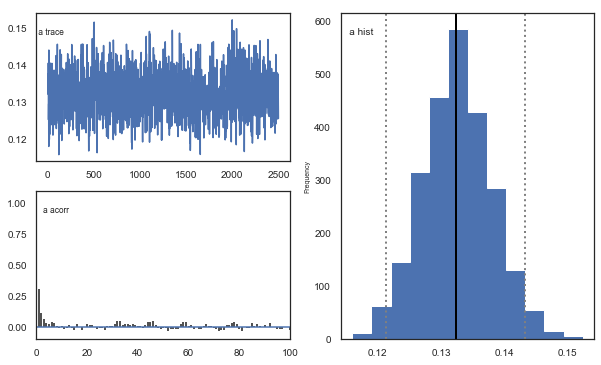

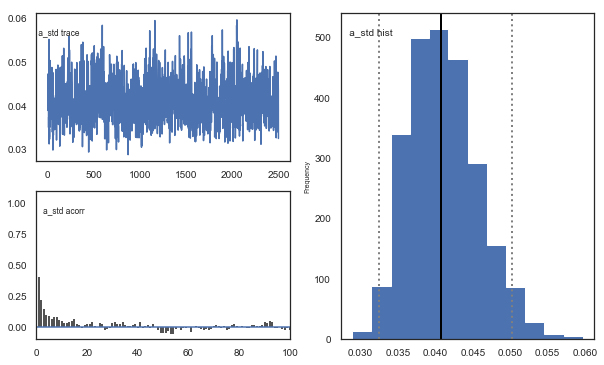

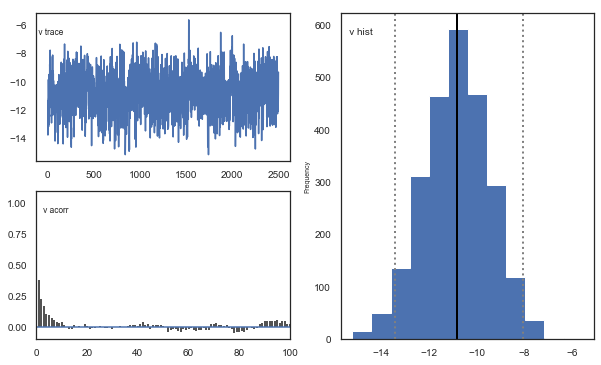

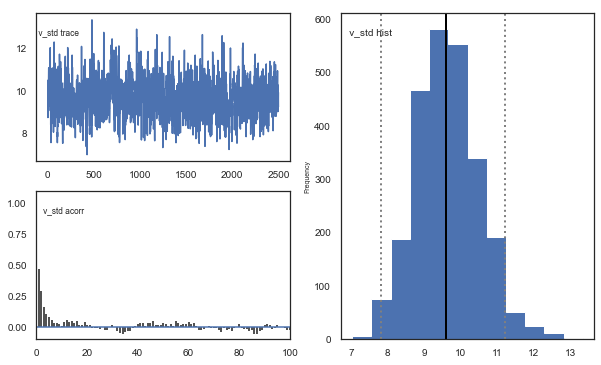

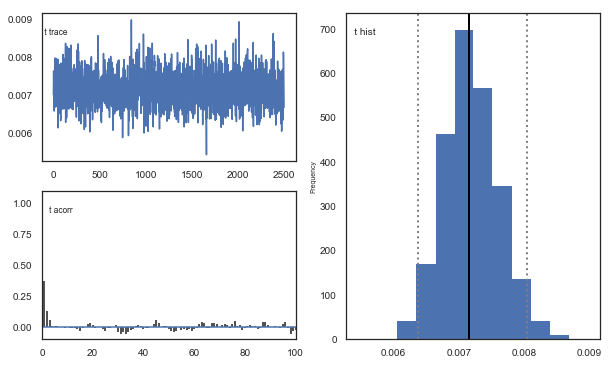

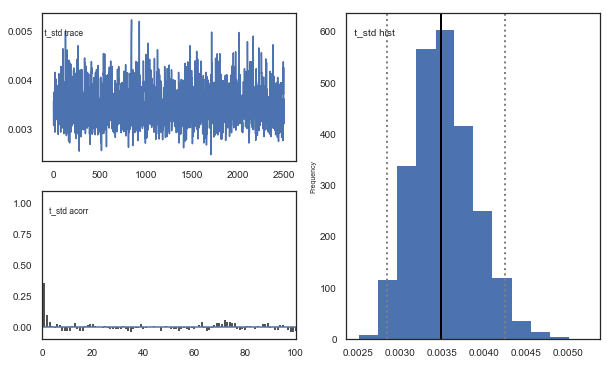

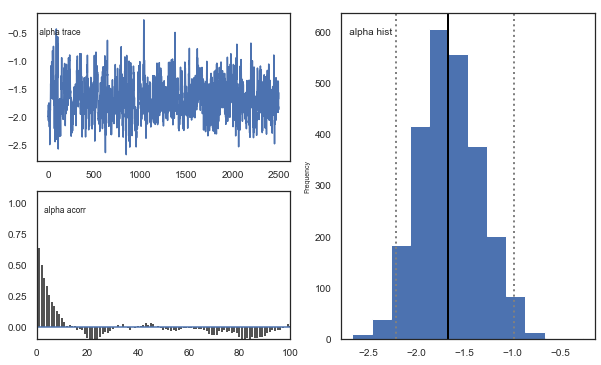

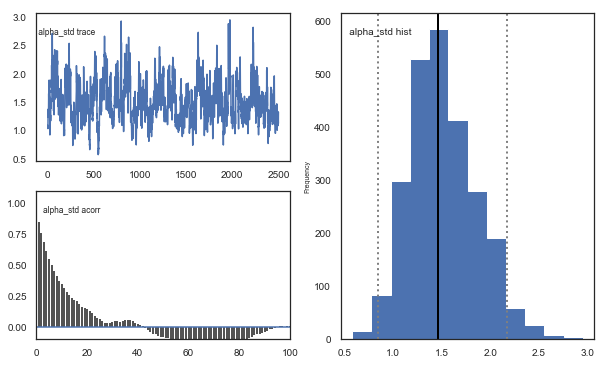

In [6]:
# plot the posteriors of parameters
m.plot_posteriors()

In [4]:
# estimate convergence
from kabuki.analyze import gelman_rubin

models = []
for i in range(3):
    m = hddm.HDDMrl(data=data)
    m.sample(4000, burn=1500, dbname="traces.db", db="pickle")
    models.append(m)

gelman_rubin(models)

 [-----------------100%-----------------] 4000 of 4000 complete in 1134.4 sec

{'a': 1.0053302967202755,
 'a_std': 1.0055654108488037,
 'a_subj.40': 1.0000032399287377,
 'a_subj.42': 1.000471859321015,
 'a_subj.45': 1.232603246879123,
 'a_subj.47': 0.9999308029499913,
 'a_subj.48': 1.0013885167131054,
 'a_subj.49': 1.0003819586835667,
 'a_subj.50': 1.0001819506306078,
 'a_subj.52': 1.001105894144627,
 'a_subj.54': 0.9998154917617894,
 'a_subj.56': 1.0042527361586626,
 'a_subj.57': 0.9998385377719649,
 'a_subj.58': 1.0015458714155943,
 'a_subj.59': 1.000715701575038,
 'a_subj.60': 0.9998450437932183,
 'a_subj.61': 0.9999696286584595,
 'a_subj.63': 1.000880711563109,
 'a_subj.64': 1.0000310596464579,
 'a_subj.65': 1.0019522223893993,
 'a_subj.66': 1.000787651938498,
 'a_subj.67': 1.0002521112616594,
 'a_subj.68': 1.0001448455117636,
 'a_subj.69': 1.0029431122552463,
 'a_subj.70': 1.0006350688028236,
 'a_subj.71': 0.9999419626954095,
 'a_subj.72': 1.0001133681904621,
 'a_subj.73': 1.0003115429534624,
 'a_subj.74': 1.001245447463766,
 'a_subj.76': 1.0004173940290406,

In [5]:
np.max(list(gelman_rubin(models).values()))

1.2899515423337629

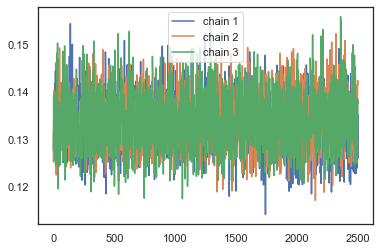

In [6]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['a'].values, label='chain 1')
ax.plot(models[1].get_traces()['a'].values, label='chain 2')
ax.plot(models[2].get_traces()['a'].values, label='chain 3')
ax.legend()

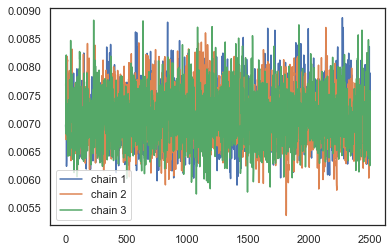

In [7]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['t'].values, label='chain 1')
ax.plot(models[1].get_traces()['t'].values, label='chain 2')
ax.plot(models[2].get_traces()['t'].values, label='chain 3')
ax.legend()

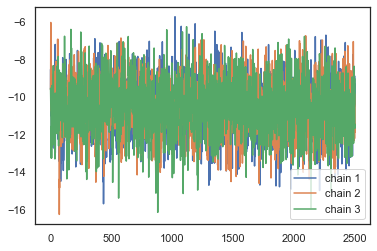

In [8]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['v'].values, label='chain 1')
ax.plot(models[1].get_traces()['v'].values, label='chain 2')
ax.plot(models[2].get_traces()['v'].values, label='chain 3')
ax.legend()

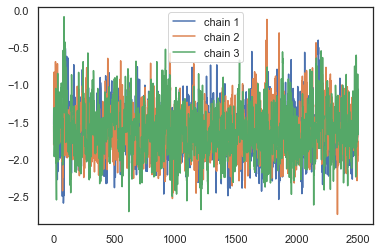

In [9]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['alpha'].values, label='chain 1')
ax.plot(models[1].get_traces()['alpha'].values, label='chain 2')
ax.plot(models[2].get_traces()['alpha'].values, label='chain 3')
ax.legend()

In [10]:
# Combine the models we ran to test for convergence.
m = kabuki.utils.concat_models(models)

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


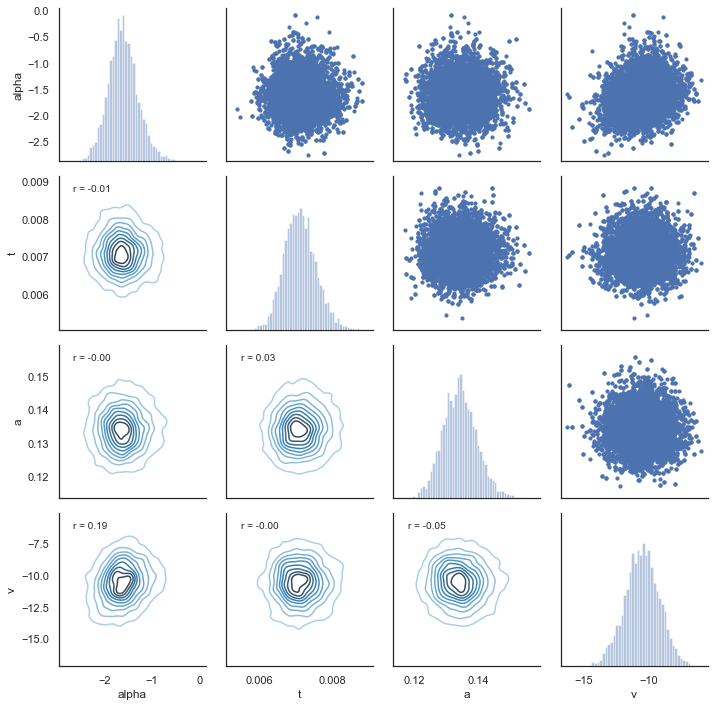

In [11]:
alpha, t, a, v = m.nodes_db.node[["alpha", "t", "a", "v"]]
samples = {"alpha": alpha.trace(), "t": t.trace(), "a": a.trace(), "v": v.trace()}
samp = pd.DataFrame(data=samples)


def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(0.1, 0.9), xycoords=ax.transAxes)


g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10) # marker size
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
g.savefig("matrix_plot.png")

In [12]:
traces = m.get_traces()
traces.head()

,a,a_std,a_subj.40,a_subj.42,a_subj.45,a_subj.47,a_subj.48,a_subj.49,a_subj.50,a_subj.52,...,alpha_subj.118,alpha_subj.119,alpha_subj.120,alpha_subj.121,alpha_subj.122,alpha_subj.123,alpha_subj.125,alpha_subj.126,alpha_subj.127,alpha_subj.130
0,0.127596,0.034355,0.117148,0.047222,0.207118,0.077545,0.075727,0.084917,0.061454,0.126997,...,1.075705,0.813667,-3.752623,-1.873831,-1.544108,-1.408380,-2.581556,-0.648964,-3.746807,-0.812396
1,0.135689,0.037304,0.108518,0.049729,0.196215,0.062264,0.074849,0.081743,0.064166,0.139553,...,-2.521928,-1.669340,-3.254314,-2.647129,-2.078109,0.057631,-2.694734,-1.096937,0.321803,-2.120007
2,0.139197,0.041411,0.111602,0.046881,0.218123,0.072221,0.075299,0.080415,0.062705,0.137072,...,-1.679276,-2.129738,-3.456091,-2.530521,-1.868016,-0.523132,-3.554959,-0.211112,-0.382960,-2.137502
3,0.134245,0.041677,0.119694,0.045009,0.212622,0.067523,0.076476,0.079594,0.061812,0.146853,...,-0.123052,-0.631178,-3.162888,-3.282548,-0.729575,-1.393299,-3.791892,0.441332,-2.557286,-1.759405
4,0.131251,0.038208,0.108470,0.040220,0.221888,0.072932,0.065305,0.088944,0.059340,0.145813,...,-0.823631,-2.619462,-1.609657,-3.439706,-0.648495,-1.628640,-3.654449,-2.090662,-3.599744,-0.941633


In [14]:
from tqdm import tqdm  # progress tracker

# create empty dataframe to store simulated data
sim_data = pd.DataFrame()
# create a column samp to be used to identify the simulated data sets
data["samp"] = 0
# load traces
traces = m.get_traces()
# decide how many times to repeat simulation process. repeating this multiple times is generally recommended,
# as it better captures the uncertainty in the posterior distribution, but will also take some time
for i in tqdm(range(1, 51)):
    # randomly select a row in the traces to use for extracting parameter values
    sample = np.random.randint(0, traces.shape[0] - 1)
    # loop through all subjects in observed data
    for s in data.subj_idx.unique():
        # get number of trials for each condition.
        size0 = len(
            data[(data["subj_idx"] == s) & (data["split_by"] == 0)].trial.unique()
        )
        size1 = len(
            data[(data["subj_idx"] == s) & (data["split_by"] == 1)].trial.unique()
        )
        # set parameter values for simulation
        a = traces.loc[sample, "a_subj." + str(s)]
        t = traces.loc[sample, "t_subj." + str(s)]
        scaler = traces.loc[sample, "v_subj." + str(s)]
        alphaInv = traces.loc[sample, "alpha_subj." + str(s)]
        # take inverse logit of estimated alpha
        alpha = np.exp(alphaInv) / (1 + np.exp(alphaInv))
        # simulate data for each condition changing only values of size, p_upper, p_lower and split_by between conditions.
        sim_data0 = hddm.generate.gen_rand_rlddm_data(
            a=a,
            t=t,
            scaler=scaler,
            alpha=alpha,
            p_upper=1,
            p_lower=0,
            split_by=0,
            size=size0,
        )
        sim_data1 = hddm.generate.gen_rand_rlddm_data(
            a=a,
            t=t,
            scaler=scaler,
            alpha=alpha,
            p_upper=1,
            p_lower=0,
            split_by=1,
            size=size1,
        )
#         # append the conditions
        sim_data0 = sim_data0.append([sim_data1], ignore_index=True)
        # assign subj_idx
        sim_data0["subj_idx"] = s
        # identify that these are simulated data
        sim_data0["type"] = "simulated"
        # identify the simulated data
        sim_data0["samp"] = i
        # append data from each subject
        sim_data = sim_data.append(sim_data0, ignore_index=True)
# combine observed and simulated data
ppc_data = data[
    ["subj_idx", "response", "split_by", "rt", "trial", "feedback", "samp"]
].copy()
ppc_data["type"] = "observed"
ppc_sdata = sim_data[
    ["subj_idx", "response", "split_by", "rt", "trial", "feedback", "type", "samp"]
].copy()
ppc_data = ppc_data.append(ppc_sdata)
ppc_data.to_csv("ppc_data_false_choice.csv")

100%|██████████| 50/50 [22:04<00:00, 26.48s/it]


In [15]:
ppc_data

,subj_idx,response,split_by,rt,trial,feedback,samp,type
0,40,0.0,0,0.016550,1,-1.0,0,observed
1,40,1.0,1,0.017136,2,1.0,0,observed
2,40,0.0,0,0.016106,3,-1.0,0,observed
3,40,1.0,1,0.015544,4,1.0,0,observed
4,40,1.0,1,0.016076,5,1.0,0,observed
...,...,...,...,...,...,...,...,...
158945,130,1.0,1,0.020757,3,1.0,50,simulated
158946,130,1.0,1,0.020757,4,1.0,50,simulated
158947,130,0.0,1,0.020757,5,0.0,50,simulated
158948,130,0.0,1,0.022757,6,0.0,50,simulated


In [16]:
plot_ppc_data = ppc_data.copy()

In [17]:
# bin trials to for smoother estimate of response proportion across learning
plot_ppc_data["bin_trial"] = pd.cut(
    plot_ppc_data.trial, 50, labels=np.linspace(0, 51, 50)
).astype("int64")
# calculate means for each sample
sums = (
    plot_ppc_data.groupby(["bin_trial", "split_by", "samp", "type"])
    .mean()
    .reset_index()
)
# calculate the overall mean response across samples
ppc_sim = sums.groupby(["bin_trial", "split_by", "type"]).mean().reset_index()
# initiate columns that will have the upper and lower bound of the hpd
ppc_sim["upper_hpd"] = 0
ppc_sim["lower_hpd"] = 0
for i in range(0, ppc_sim.shape[0]):
    # calculate the hpd/hdi of the predicted mean responses across bin_trials
    hdi = pymc.utils.hpd(
        sums.response[
            (sums["bin_trial"] == ppc_sim.bin_trial[i])
            & (sums["split_by"] == ppc_sim.split_by[i])
            & (sums["type"] == ppc_sim.type[i])
        ],
        alpha=0.1,
    )
    ppc_sim.loc[i, "upper_hpd"] = hdi[1]
    ppc_sim.loc[i, "lower_hpd"] = hdi[0]
# calculate error term as the distance from upper bound to mean
ppc_sim["up_err"] = ppc_sim["upper_hpd"] - ppc_sim["response"]
ppc_sim["low_err"] = ppc_sim["response"] - ppc_sim["lower_hpd"]
ppc_sim["model"] = "RLDDM_single_learning"
ppc_sim.to_csv("ppc_sim_false_choice.csv")

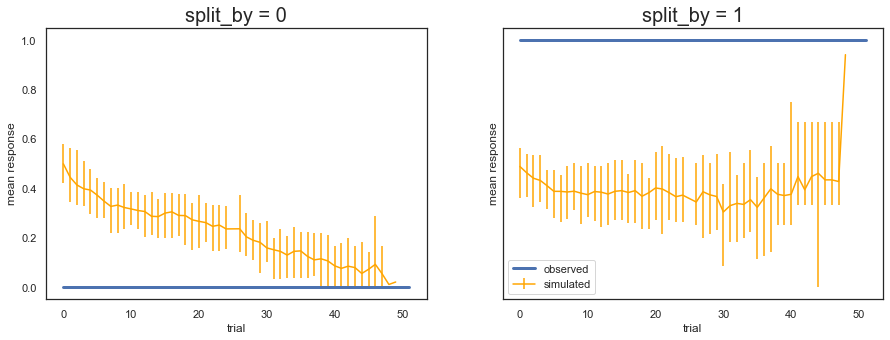

In [21]:
# plotting evolution of choice proportion for best option across learning for observed and simulated data.
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, sharex=True, sharey=True)
for i in range(2):
    ax = axs[i]
#     ax = axs
    d = ppc_sim[(ppc_sim.split_by == i) & (ppc_sim.type == "simulated")]
    ax.errorbar(
        d.bin_trial,
        d.response,
        yerr=[d.low_err, d.up_err],
        label="simulated",
        color="orange",
    )
    d = ppc_sim[(ppc_sim.split_by == i) & (ppc_sim.type == "observed")]
    ax.plot(d.bin_trial, d.response, linewidth=3, label="observed")
    ax.set_title("split_by = %i" % i, fontsize=20)
    ax.set_ylabel("mean response")
    ax.set_xlabel("trial")
plt.legend()
fig.savefig("PPCchoice.pdf")

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/ottolab/anaconda3/envs/py36/lib/python3.6/sit

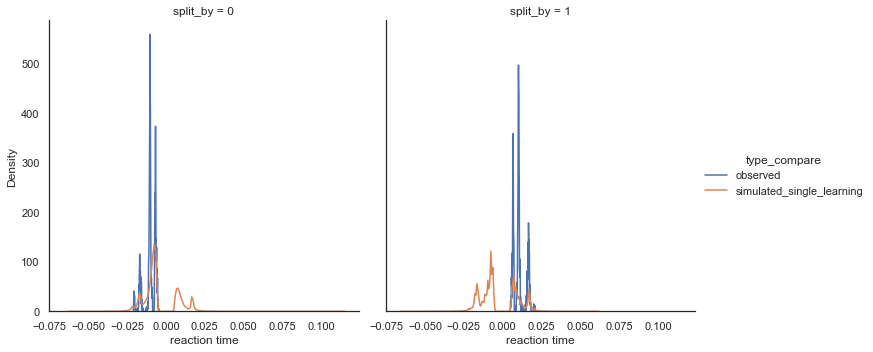

In [22]:
plot_ppc_data["type_compare"] = np.where(
    plot_ppc_data["type"] == "observed",
    plot_ppc_data["type"],
    "simulated_single_learning",
)
dual_vs_single_pcc = plot_ppc_data
dual_vs_single_pcc["reaction time"] = np.where(
    dual_vs_single_pcc["response"] == 1,
    dual_vs_single_pcc.rt,
    0 - dual_vs_single_pcc.rt,
)
# plotting evolution of choice proportion for best option across learning for observed and simulated data. We use bins of trials because plotting individual trials would be very noisy.
g = sns.FacetGrid(dual_vs_single_pcc, col="split_by", hue="type_compare", height=5)
g.map(sns.kdeplot, "reaction time", bw=0.01).set_ylabels("Density")
g.add_legend()

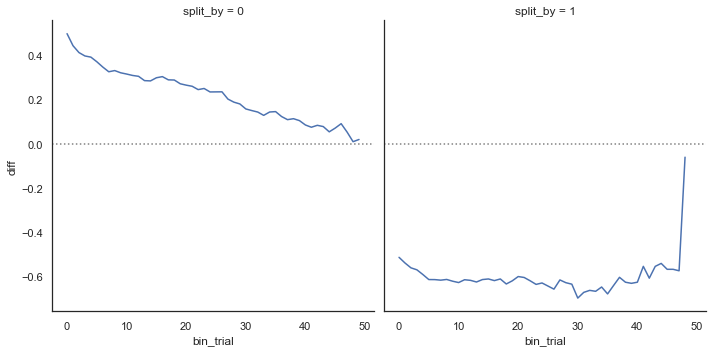

In [23]:
# rlddm
error_prediction = (
    plot_ppc_data.groupby(["split_by", "type", "bin_trial"])["response"]
    .mean()
    .reset_index()
)
ep_rlddm = error_prediction.pivot_table(
    index=["split_by", "bin_trial"], columns="type", values="response"
).reset_index()
ep_rlddm["diff"] = ep_rlddm["simulated"] - ep_rlddm["observed"]
ep_rlddm["model"] = "RLDDM"
# plot
g = sns.relplot(
    x="bin_trial",
    y="diff",
    col="split_by",
#     hue="model",
    kind="line",
    ci=False,
    data=ep_rlddm,
    palette="Set2_r",
)
g.map(plt.axhline, y=0, ls=":", c=".5")